##Sayali Kawatkar Roll no. 31

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from datetime import datetime
from pandas import Series

In [ ]:
df=pd.read_csv("Electric_Production.csv")
# df1=df.copy()
df.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [ ]:
df["DATE"]=pd.to_datetime(df["DATE"])
df.dtypes
df.head()

,DATE,IPG2211A2N
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151


In [ ]:
# Parse strings to datatime type
df['DATE'] = pd.to_datetime(df['DATE'], infer_datetime_format=True)
indexedDataset = df.set_index(['DATE'])

In [ ]:
indexedDataset.head(5)

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [ ]:
indexedDataset.tail(5)

,IPG2211A2N
DATE,
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359
2017-12-01,114.7212
2018-01-01,129.4048


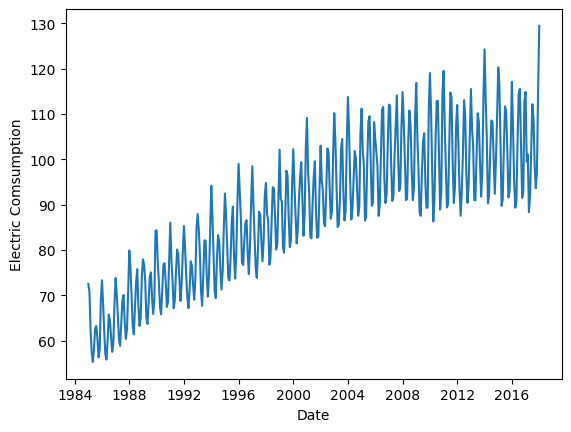

In [ ]:
# Plot graph
plt.xlabel("Date")
plt.ylabel("Electric Comsumption")
plt.plot(indexedDataset)

In [ ]:
# Detecting Stationarity using Rolling Statistics
# As the mean is not constant, That
# rolling mean at yearly level
rollmean = indexedDataset.rolling(window=12).mean()
# rolling std at yearly level
rollstd = indexedDataset.rolling(window=12).std()
print(rollmean, rollstd)

            IPG2211A2N
DATE                  
1985-01-01         NaN
1985-02-01         NaN
1985-03-01         NaN
1985-04-01         NaN
1985-05-01         NaN
...                ...
2017-09-01  101.234450
2017-10-01  101.411700
2017-11-01  101.782192
2017-12-01  101.944842
2018-01-01  103.157700

[397 rows x 1 columns]             IPG2211A2N
DATE                  
1985-01-01         NaN
1985-02-01         NaN
1985-03-01         NaN
1985-04-01         NaN
1985-05-01         NaN
...                ...
2017-09-01    9.155641
2017-10-01    8.968447
2017-11-01    8.671317
2017-12-01    8.911131
2018-01-01   11.454780

[397 rows x 1 columns]


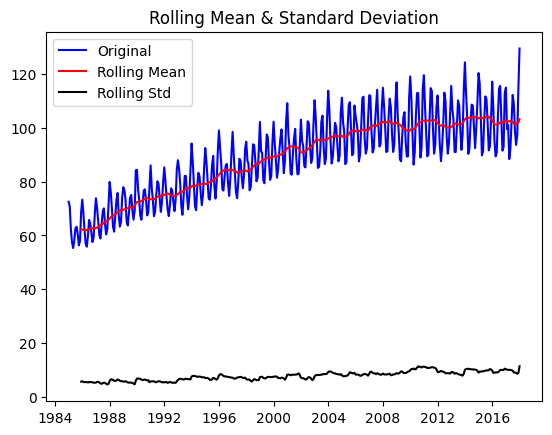

In [ ]:
# Plot rolling statistics
orig = plt.plot(indexedDataset, color = 'blue', label = "Original")
mean = plt.plot(rollmean, color = 'red', label = "Rolling Mean")
std = plt.plot(rollstd, color = 'black', label = "Rolling Std")
plt.legend(loc = "best")
plt.title("Rolling Mean & Standard Deviation")
plt.show()

In [ ]:
# Perform Dicky-Fuller Test
#import statsmodels.tsa.stattools
from statsmodels.tsa.stattools import adfuller
print("Results of Dickey Fuller Test")
# Here AIC helps to analyse the exact value from actual values and difference between them
dftest = adfuller(indexedDataset['IPG2211A2N'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4],index=['Test statistic','p-value','#Lags used','No. of observations used'])
for key, value in dftest[4].items():
  dfoutput['Critical value (%s)'%key]= value

print(dfoutput)

Results of Dickey Fuller Test
Test statistic               -2.256990
p-value                       0.186215
#Lags used                   15.000000
No. of observations used    381.000000
Critical value (1%)          -3.447631
Critical value (5%)          -2.869156
Critical value (10%)         -2.570827
dtype: float64


In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeSeries):
  # Determinig Rolling statistics
  movingaverage = timeSeries.rolling(window=12).mean()
  movingSTD = timeSeries.rolling(window=12).std()

  # Plot rolling statistics
  orig = plt.plot(timeSeries, color = 'blue', label = "Original")
  mean = plt.plot(movingaverage, color = 'red', label = "Rolling Mean")
  std = plt.plot(movingSTD, color = 'black', label = "Rolling Std")
  plt.legend(loc = "best")
  plt.title("Rolling Mean & Standard Deviation")
  plt.show()

  # Perform Dickey-Fuller Test
  print("Results of Dickey Fuller Test")
  dftest = adfuller(timeSeries['IPG2211A2N'], autolag='AIC')
  dfoutput = pd.Series(dftest[0:4],index=['Test statistic','p-value','#Lags used','No. of observations used'])
  for key, value in dftest[4].items():
    dfoutput['Critical value (%s)'%key]= value
  print(dfoutput)

#### Applying LogScale to Raw Data

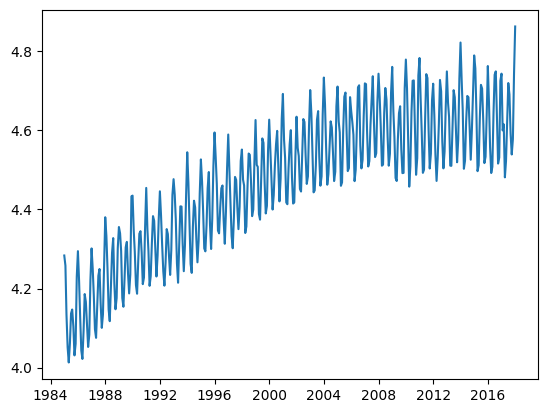

In [ ]:
# Estimating trend
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

### Transformation - 1 : Subtracting Moving Average from LogScale Data

#### 1(a) : Computation

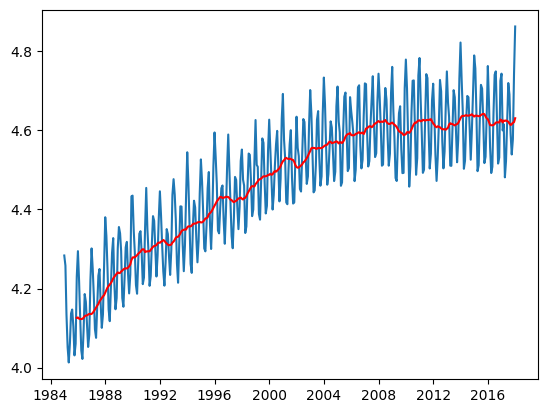

In [ ]:
movingaverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingaverage, color='red')
#plt.plot(movingSTD, color='black')

In [ ]:
dataLogScaleMinusMovingAverage = indexedDataset_logScale - movingaverage
dataLogScaleMinusMovingAverage.head(12)

,IPG2211A2N
DATE,
1985-01-01,NaN
1985-02-01,NaN
1985-03-01,NaN
1985-04-01,NaN
1985-05-01,NaN
1985-06-01,NaN
1985-07-01,NaN
1985-08-01,NaN
1985-09-01,NaN


In [ ]:
#Remove NaN values
dataLogScaleMinusMovingAverage.dropna(inplace=True)
dataLogScaleMinusMovingAverage.head(18)

,IPG2211A2N
DATE,
1985-12-01,0.103961
1986-01-01,0.167724
1986-02-01,0.095629
1986-03-01,0.007329
1986-04-01,-0.079115
1986-05-01,-0.101472
1986-06-01,-0.033363
1986-07-01,0.055963
1986-08-01,0.034639


#### 1(b) : Plotting

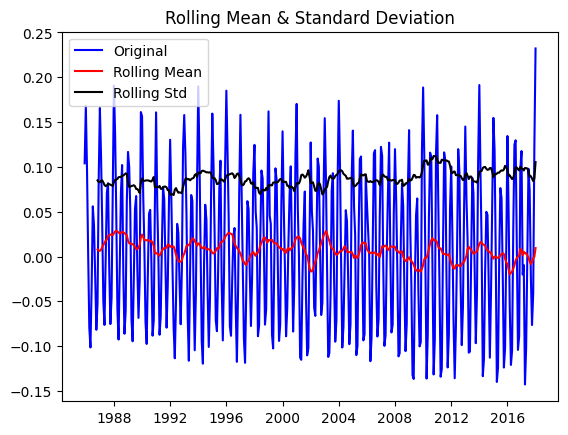

Results of Dickey Fuller Test
Test statistic               -5.211586
p-value                       0.000008
#Lags used                   15.000000
No. of observations used    370.000000
Critical value (1%)          -3.448148
Critical value (5%)          -2.869383
Critical value (10%)         -2.570948
dtype: float64


In [ ]:
test_stationarity(dataLogScaleMinusMovingAverage)

### Transformation - 2 : Subtrating Exponential Decay Weighted Average from LogScale Data

#### 2(a) : Computation

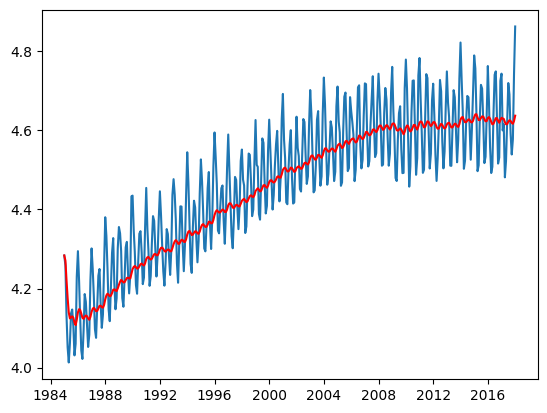

In [ ]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12,min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage,color='red')

In [ ]:
datasetLogScaleMinusMovingExponentialDecayAverage = indexedDataset_logScale - exponentialDecayWeightedAverage

#### 2(b) :  Plotting

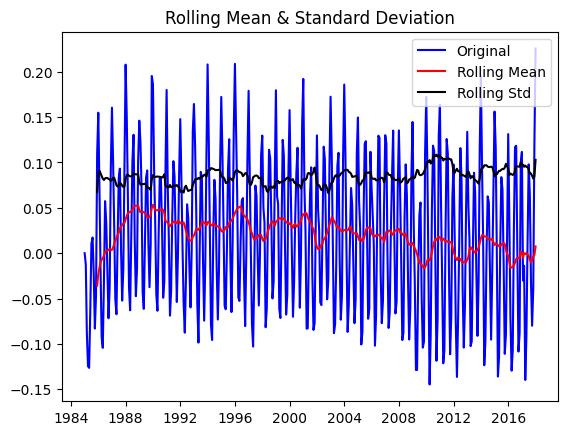

Results of Dickey Fuller Test
Test statistic               -3.251531
p-value                       0.017189
#Lags used                   15.000000
No. of observations used    381.000000
Critical value (1%)          -3.447631
Critical value (5%)          -2.869156
Critical value (10%)         -2.570827
dtype: float64


In [ ]:
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

## Step - 5 : Understanding the **Components** of Time Series

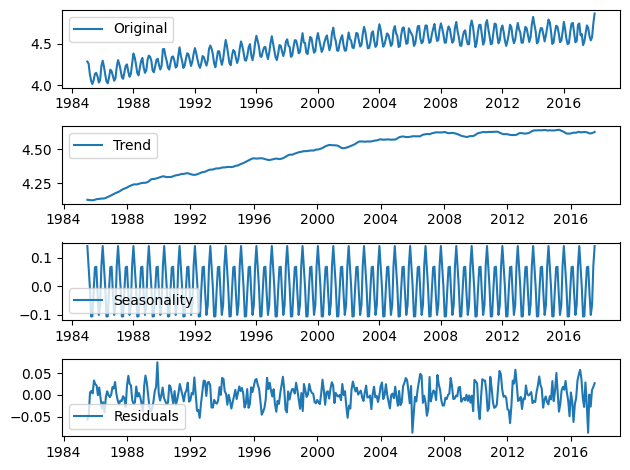

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(indexedDataset_logScale, label = 'Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

## Step - 6 : Check whether the noise is stationary or not

In [ ]:
decomposedLogData = residual
decomposedLogData.dropna(inplace = True)
print(decomposedLogData)

DATE
1985-07-01   -0.056549
1985-08-01   -0.047294
1985-09-01    0.005724
1985-10-01    0.008954
1985-11-01    0.003336
                ...   
2017-03-01    0.000847
2017-04-01   -0.026743
2017-05-01    0.010879
2017-06-01    0.018331
2017-07-01    0.026774
Name: resid, Length: 385, dtype: float64


In [ ]:
decomposedLogData.describe()

count    385.000000
mean      -0.000106
std        0.023880
min       -0.086378
25%       -0.016121
50%       -0.000118
75%        0.017180
max        0.074662
Name: resid, dtype: float64

In [ ]:
decomposedLogData.head(12)

DATE
1985-07-01   -0.056549
1985-08-01   -0.047294
1985-09-01    0.005724
1985-10-01    0.008954
1985-11-01    0.003336
1985-12-01    0.032966
1986-01-01    0.024399
1986-02-01    0.021526
1986-03-01   -0.000560
1986-04-01    0.017005
1986-05-01   -0.007243
1986-06-01   -0.030872
Name: resid, dtype: float64

##Experiment 5: Implement ARIMA model

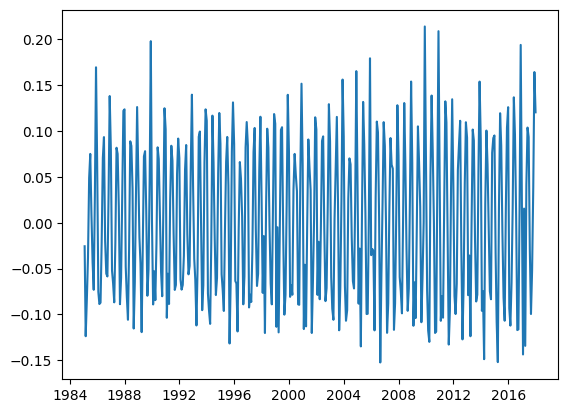

In [ ]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

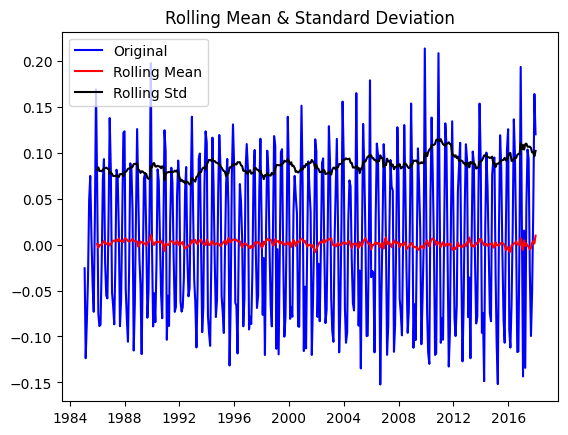

Results of Dickey Fuller Test
Test statistic             -6.748333e+00
p-value                     2.995161e-09
#Lags used                  1.400000e+01
No. of observations used    3.810000e+02
Critical value (1%)        -3.447631e+00
Critical value (5%)        -2.869156e+00
Critical value (10%)       -2.570827e+00
dtype: float64


In [ ]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

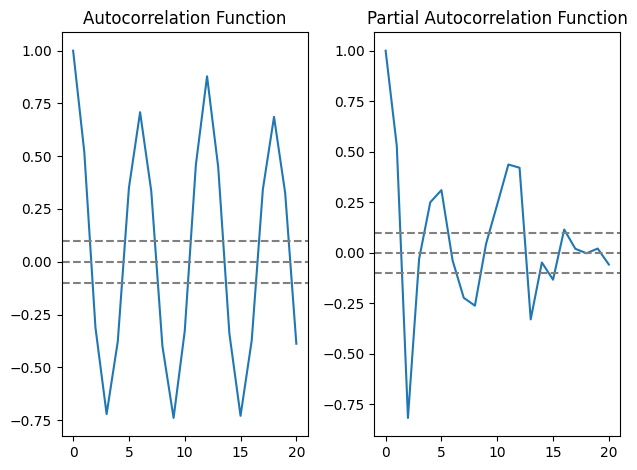

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(datasetLogScaleMinusMovingExponentialDecayAverage, nlags=20)
lag_pacf = pacf(datasetLogScaleMinusMovingExponentialDecayAverage,nlags=20, method='ols')

#Plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--',color='grey')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogScaleMinusMovingExponentialDecayAverage)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogScaleMinusMovingExponentialDecayAverage)), linestyle='--', color='gray')
plt.title("Autocorrelation Function")

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--',color='grey')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogScaleMinusMovingExponentialDecayAverage)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogScaleMinusMovingExponentialDecayAverage)), linestyle='--', color='gray')
plt.title("Partial Autocorrelation Function")
plt.tight_layout()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


DATE
1985-01-01    0.019896
1985-02-01    0.009449
1985-03-01    0.005293
1985-04-01   -0.056629
1985-05-01   -0.029871
                ...   
2017-09-01   -0.000693
2017-10-01   -0.066717
2017-11-01   -0.032435
2017-12-01    0.045327
2018-01-01    0.161491
Length: 397, dtype: float64
RSS: 0.688632
Plotting AR Model


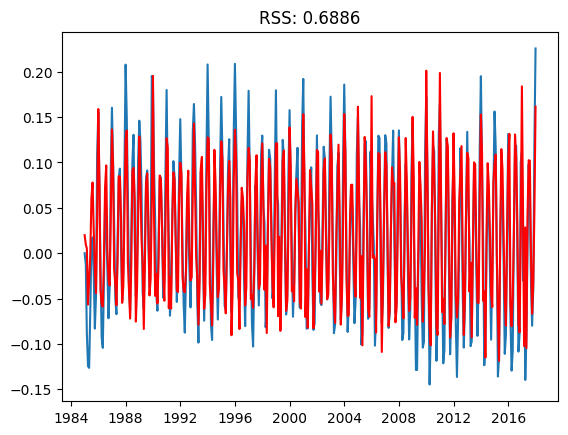

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# AR Model
model_0 = ARIMA(datasetLogScaleMinusMovingExponentialDecayAverage, order=(2,0,0))
results_AR = model_0.fit()
print(results_AR.fittedvalues)
print('RSS: %f' % sum((results_AR.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['IPG2211A2N'])**2))
plt.plot(datasetLogScaleMinusMovingExponentialDecayAverage)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_AR.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['IPG2211A2N'])**2))
print("Plotting AR Model")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


DATE
1985-01-01    0.020397
1985-02-01    0.006565
1985-03-01   -0.002711
1985-04-01   -0.079615
1985-05-01   -0.071290
                ...   
2017-09-01    0.044540
2017-10-01   -0.057724
2017-11-01   -0.046386
2017-12-01    0.016798
2018-01-01    0.137397
Length: 397, dtype: float64
RSS: 1.132321
Plotting Ma Model


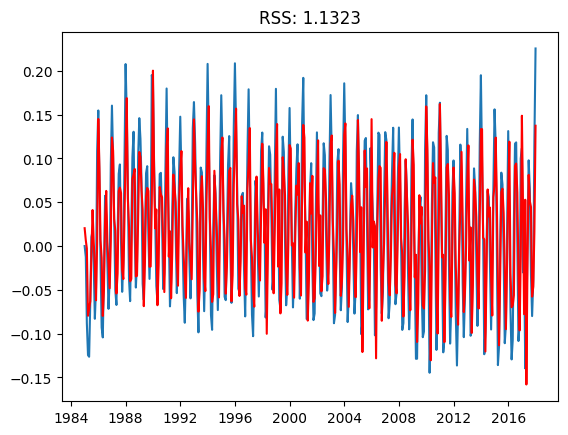

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# MA Model
model_02 = ARIMA(datasetLogScaleMinusMovingExponentialDecayAverage, order=(0,0,2))
results_MA = model_02.fit()
print(results_MA.fittedvalues)
print('RSS: %f' % sum((results_MA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['IPG2211A2N'])**2))
plt.plot(datasetLogScaleMinusMovingExponentialDecayAverage)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_MA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['IPG2211A2N'])**2))
print("Plotting Ma Model")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


DATE
1985-01-01    0.019722
1985-02-01    0.010604
1985-03-01    0.008485
1985-04-01   -0.004398
1985-05-01    0.006366
                ...   
2017-09-01   -0.034409
2017-10-01   -0.088357
2017-11-01   -0.031880
2017-12-01    0.072160
2018-01-01    0.138153
Length: 397, dtype: float64
RSS: 0.579974
Plotting ARMA Model


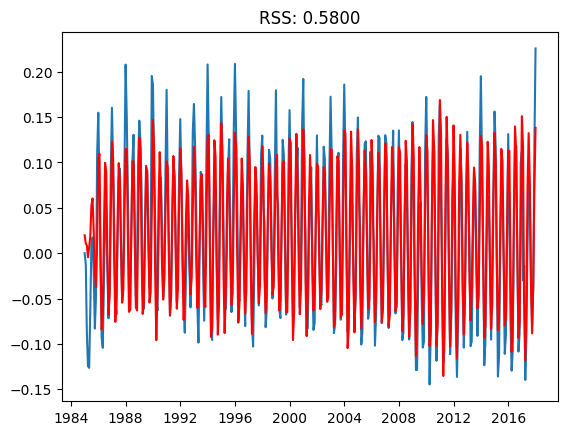

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# ARMA Model
model_03 = ARIMA(datasetLogScaleMinusMovingExponentialDecayAverage, order=(2,0,2))
results_ARMA = model_03.fit()
print(results_ARMA.fittedvalues)
print('RSS: %f' % sum((results_ARMA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['IPG2211A2N'])**2))
plt.plot(datasetLogScaleMinusMovingExponentialDecayAverage)
plt.plot(results_ARMA.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_ARMA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['IPG2211A2N'])**2))
print("Plotting ARMA Model")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


DATE
1985-01-01    0.000000
1985-02-01    0.000000
1985-03-01   -0.017523
1985-04-01   -0.132166
1985-05-01   -0.105237
                ...   
2017-09-01   -0.057152
2017-10-01   -0.112336
2017-11-01   -0.038777
2017-12-01    0.081958
2018-01-01    0.196800
Length: 397, dtype: float64
RSS: 0.473485
Plotting ARIMA Model


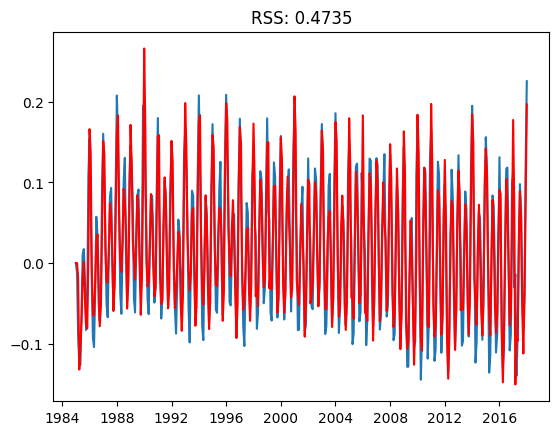

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# ARIMA Model
model_1 = ARIMA(datasetLogScaleMinusMovingExponentialDecayAverage, order=(2,1,2))
results_ARIMA = model_1.fit()
print(results_ARIMA.fittedvalues)
print('RSS: %f' % sum((results_ARIMA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['IPG2211A2N'])**2))
plt.plot(datasetLogScaleMinusMovingExponentialDecayAverage)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_ARIMA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['IPG2211A2N'])**2))
print("Plotting ARIMA Model")

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.6 MB/s eta 0:00:00


In [ ]:
from pmdarima import auto_arima
#ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
stepwise_fit=auto_arima(indexedDataset_logScale, trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1490.352, Time=0.99 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-832.493, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-894.034, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-969.694, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-834.374, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1051.702, Time=0.67 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1355.520, Time=0.55 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1481.483, Time=1.04 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.58 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-968.997, Time=0.97 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1139.799, Time=1.68 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1365.378, Time=0.93 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1482.144, Time=1.33 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=inf, Time=0.85 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0]

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  397
Model:               SARIMAX(2, 1, 2)   Log Likelihood                 751.176
Date:                Tue, 26 Mar 2024   AIC                          -1490.352
Time:                        17:14:03   BIC                          -1466.463
Sample:                    01-01-1985   HQIC                         -1480.888
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0022      0.002      1.298      0.194      -0.001       0.005
ar.L1          1.0007      0.002    533.621      0.000       0.997       1.004
ar.L2         -0.9986      0.001   -866.382      0.000      -1.001      -0.996
ma.L1         -1.0508      0.015    -71.360      0.000      -1.080      -1.022
ma.L2          0.9681      0.017     57.604      0.000       0.935       1.001
sigma2         0.0013   7.71e-05     16.442      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   3.52   Jarque-Bera (JB):                 8.23
Prob(Q):                              0.06   Prob(JB):                         0.02
Heteroskedasticity (H):               1.15   Skew:                            -0.03
Prob(H) (two-sided):                  0.42   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

DATE
1985-01-01    0.000000
1985-02-01    0.000000
1985-03-01   -0.014930
1985-04-01   -0.104297
1985-05-01   -0.104562
                ...   
2017-09-01   -0.054253
2017-10-01   -0.107039
2017-11-01   -0.058906
2017-12-01    0.072423
2018-01-01    0.183819
Length: 397, dtype: float64
RSS: 0.477658
Plotting ARIMA Model


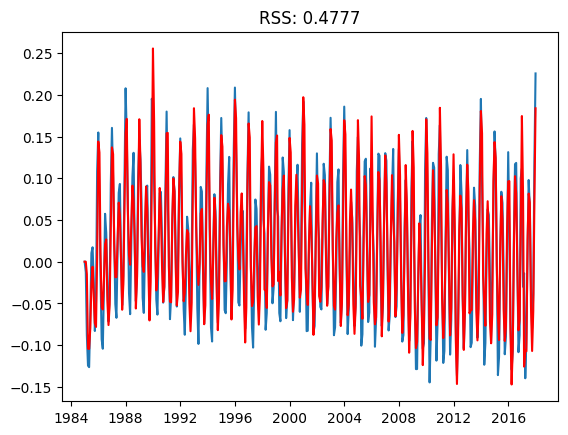

In [ ]:
#fit the ARIMA model
from statsmodels.tsa.arima.model import ARIMA
# ARIMA Model
model_2 = ARIMA(datasetLogScaleMinusMovingExponentialDecayAverage, order=(4,1,3))
results_ARIMA = model_2.fit()
print(results_ARIMA.fittedvalues)
print('RSS: %f' % sum((results_ARIMA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['IPG2211A2N'])**2))
plt.plot(datasetLogScaleMinusMovingExponentialDecayAverage)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_ARIMA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['IPG2211A2N'])**2))
print("Plotting ARIMA Model")

DATE
1985-02-01    0.000000
1985-03-01   -0.025609
1985-04-01   -0.102025
1985-05-01   -0.065320
1985-06-01   -0.042930
                ...   
2017-09-01   -0.124927
2017-10-01   -0.097312
2017-11-01    0.021757
2017-12-01    0.114904
2018-01-01    0.083651
Length: 396, dtype: float64
RSS: 0.595027
Plotting ARIMA Model


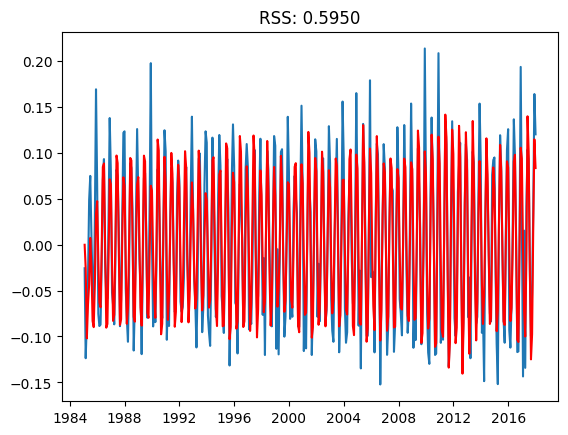

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# ARIMA Model with
model_3 = ARIMA(datasetLogDiffShifting, order=(4,1,3))
results_ARIMA = model_3.fit()
print(results_ARIMA.fittedvalues)
print('RSS: %f' % sum((results_ARIMA.fittedvalues-datasetLogDiffShifting['IPG2211A2N'])**2))
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_ARIMA.fittedvalues-datasetLogDiffShifting['IPG2211A2N'])**2))
print("Plotting ARIMA Model")

In [ ]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues,copy=True)
print(predictions_ARIMA_diff.head())

DATE
1985-02-01    0.000000
1985-03-01   -0.025609
1985-04-01   -0.102025
1985-05-01   -0.065320
1985-06-01   -0.042930
dtype: float64


In [ ]:
#Convert to Cummulative Sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

DATE
1985-02-01    0.000000
1985-03-01   -0.025609
1985-04-01   -0.127634
1985-05-01   -0.192954
1985-06-01   -0.235884
dtype: float64


In [ ]:
predictiona_ARIMA_log = pd.Series(indexedDataset_logScale['IPG2211A2N'].iloc[0],index = indexedDataset_logScale.index)
predictiona_ARIMA_log = predictiona_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictiona_ARIMA_log.head()

DATE
1985-01-01    4.283658
1985-02-01    4.283658
1985-03-01    4.258049
1985-04-01    4.156025
1985-05-01    4.090704
dtype: float64

In [ ]:
predictions_ARIMA = np.exp(predictiona_ARIMA_log)

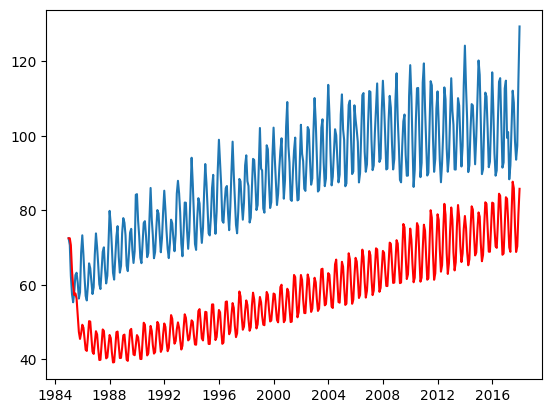

In [ ]:
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA, color='red')

In [ ]:
indexedDataset_logScale

,IPG2211A2N
DATE,
1985-01-01,4.283658
1985-02-01,4.258049
1985-03-01,4.134369
1985-04-01,4.051287
1985-05-01,4.013046
...,...
2017-09-01,4.591227
2017-10-01,4.539177
2017-11-01,4.578168


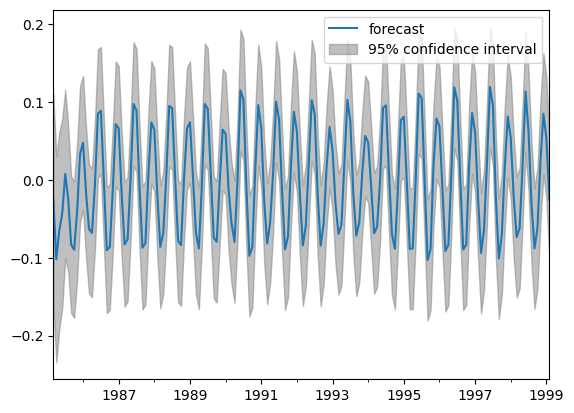

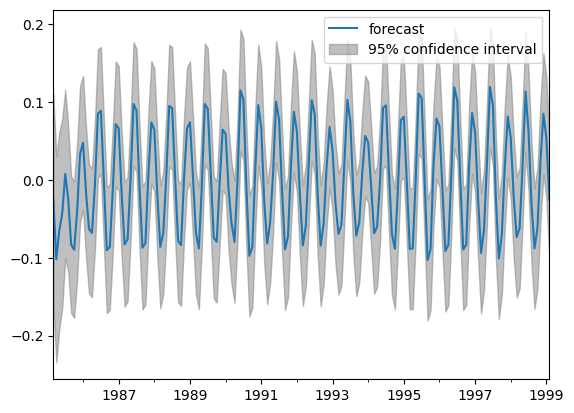

In [ ]:
from statsmodels.graphics.tsaplots import plot_predict
# We have 144 rows + 24 to be predictions
plot_predict(results_ARIMA,1,168)

In [ ]:
results_ARIMA.forecast(steps=24)

2018-02-01   -0.048192
2018-03-01   -0.127028
2018-04-01   -0.085806
2018-05-01    0.030406
2018-06-01    0.121679
2018-07-01    0.094209
2018-08-01   -0.027225
2018-09-01   -0.118267
2018-10-01   -0.088596
2018-11-01    0.029269
2018-12-01    0.117260
2019-01-01    0.089183
2019-02-01   -0.025323
2019-03-01   -0.111573
2019-04-01   -0.084643
2019-05-01    0.026900
2019-06-01    0.111221
2019-07-01    0.085358
2019-08-01   -0.023211
2019-09-01   -0.105655
2019-10-01   -0.080849
2019-11-01    0.024835
2019-12-01    0.105448
2020-01-01    0.081656
Freq: MS, Name: predicted_mean, dtype: float64

##Experiment 6: Implementation of Time series Decomposition and ACF and PACF

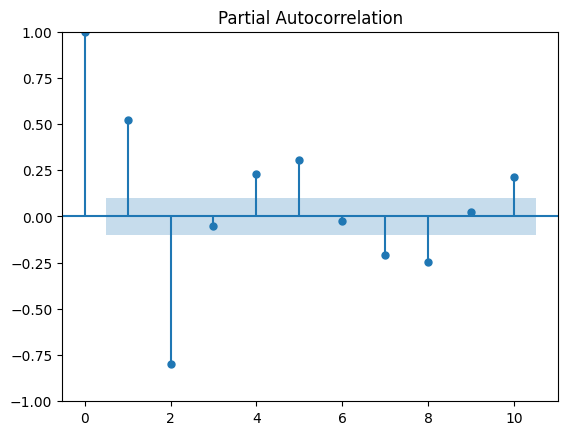

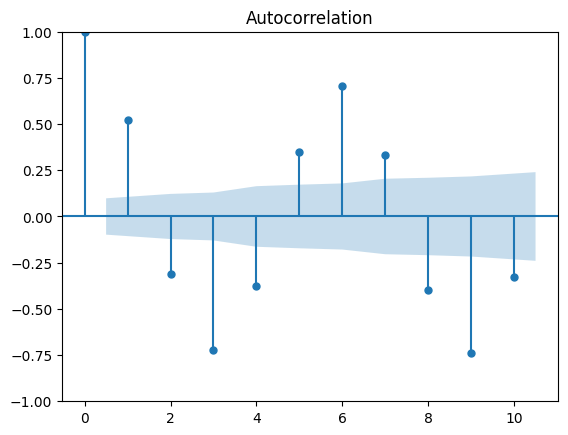

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
pacf=plot_pacf(datasetLogScaleMinusMovingExponentialDecayAverage,lags=10)
acf=plot_acf(datasetLogScaleMinusMovingExponentialDecayAverage,lags=10)

In [ ]:
train=datasetLogScaleMinusMovingExponentialDecayAverage[:len(datasetLogScaleMinusMovingExponentialDecayAverage)-60]
test=datasetLogScaleMinusMovingExponentialDecayAverage[len(datasetLogScaleMinusMovingExponentialDecayAverage)-60:]

In [ ]:
from statsmodels.tsa.ar_model import AutoReg
# AR Model with p = 2 from PACF plot
model_1 = AutoReg(train, lags=1).fit()

In [ ]:
print(model_1.summary())

                            AutoReg Model Results                             
Dep. Variable:             IPG2211A2N   No. Observations:                  337
Model:                     AutoReg(1)   Log Likelihood                 418.164
Method:               Conditional MLE   S.D. of innovations              0.070
Date:                Tue, 26 Mar 2024   AIC                           -830.328
Time:                        17:19:58   BIC                           -818.876
Sample:                    02-01-1985   HQIC                          -825.763
                         - 01-01-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0108      0.004      2.741      0.006       0.003       0.019
IPG2211A2N.L1     0.5298      0.046     11.410      0.000       0.439       0.621
                                    Root

In [ ]:
pred=model_1.predict(start=len(train),end=len(datasetLogScaleMinusMovingExponentialDecayAverage)-1, dynamic=False)

In [ ]:
print(len(train))

337


In [ ]:
print(pred)

2013-02-01    0.081678
2013-03-01    0.054075
2013-04-01    0.039450
2013-05-01    0.031701
2013-06-01    0.027595
2013-07-01    0.025419
2013-08-01    0.024267
2013-09-01    0.023656
2013-10-01    0.023333
2013-11-01    0.023161
2013-12-01    0.023070
2014-01-01    0.023022
2014-02-01    0.022997
2014-03-01    0.022983
2014-04-01    0.022976
2014-05-01    0.022972
2014-06-01    0.022970
2014-07-01    0.022969
2014-08-01    0.022969
2014-09-01    0.022968
2014-10-01    0.022968
2014-11-01    0.022968
2014-12-01    0.022968
2015-01-01    0.022968
2015-02-01    0.022968
2015-03-01    0.022968
2015-04-01    0.022968
2015-05-01    0.022968
2015-06-01    0.022968
2015-07-01    0.022968
2015-08-01    0.022968
2015-09-01    0.022968
2015-10-01    0.022968
2015-11-01    0.022968
2015-12-01    0.022968
2016-01-01    0.022968
2016-02-01    0.022968
2016-03-01    0.022968
2016-04-01    0.022968
2016-05-01    0.022968
2016-06-01    0.022968
2016-07-01    0.022968
2016-08-01    0.022968
2016-09-01 

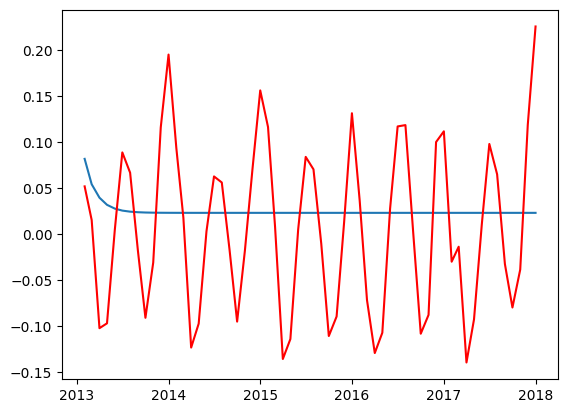

In [ ]:
plt.plot(pred)
plt.plot(test, color='red')

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse=sqrt(mean_squared_error(test,pred))
print(rmse)

0.09275650274547825


In [ ]:
pred_future=model_1.predict(start=len(datasetLogScaleMinusMovingExponentialDecayAverage)+1, end=len(datasetLogScaleMinusMovingExponentialDecayAverage)+60, dynamic=False)
print("Prediction for next 5 years")
print(pred_future)
print("No. of predictions : \t", len(pred_future))

Prediction for next 5 years
2018-03-01    0.022968
2018-04-01    0.022968
2018-05-01    0.022968
2018-06-01    0.022968
2018-07-01    0.022968
2018-08-01    0.022968
2018-09-01    0.022968
2018-10-01    0.022968
2018-11-01    0.022968
2018-12-01    0.022968
2019-01-01    0.022968
2019-02-01    0.022968
2019-03-01    0.022968
2019-04-01    0.022968
2019-05-01    0.022968
2019-06-01    0.022968
2019-07-01    0.022968
2019-08-01    0.022968
2019-09-01    0.022968
2019-10-01    0.022968
2019-11-01    0.022968
2019-12-01    0.022968
2020-01-01    0.022968
2020-02-01    0.022968
2020-03-01    0.022968
2020-04-01    0.022968
2020-05-01    0.022968
2020-06-01    0.022968
2020-07-01    0.022968
2020-08-01    0.022968
2020-09-01    0.022968
2020-10-01    0.022968
2020-11-01    0.022968
2020-12-01    0.022968
2021-01-01    0.022968
2021-02-01    0.022968
2021-03-01    0.022968
2021-04-01    0.022968
2021-05-01    0.022968
2021-06-01    0.022968
2021-07-01    0.022968
2021-08-01    0.022968
2021-0